# Serie de Fourier Ejemplo (exponencial, trigonométrica y compacta)

Sea la señal:

\begin{equation}
x(t) = \begin{cases} A, & -T/2 \leq t < 0 \\ -A, & 0 \leq t < T/2 \end{cases}
\end{equation}


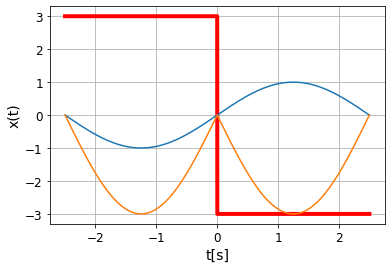

In [3]:
# Para graficar
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

A = 3
T = 5 #3 segundos de grafica
Fs = 1000 # 500 muestras por segundo Ajustar según señal estudiada
Nm = T*Fs #numero de muestras requeridas
tv = np.linspace(-T/2,T/2,Nm)

xo = np.concatenate((A*np.ones(int(Nm/2)), -A*np.ones(int(Nm/2))), axis=0)

plt.plot(tv,xo,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
#wn = n w0 = n 2 pi/T
w2 = 2*np.pi/T
sinn2 = np.sin(w2*tv)
plt.plot(tv,sinn2)
plt.plot(tv,xo*sinn2)


Su espectro en serie de Fourier (compleja) se calcula como:

\begin{equation}
c_n = \frac{1}{T}\int^{T/2}_{-T/2}{x(t)e^{-jn\omega_o t}}dt=\frac{jA}{n\pi}(1-(-1)^n); \quad n\neq 0
\end{equation}

donde 

\begin{equation}
c_0 = \frac{1}{T}\int^{T/2}_{-T/2}{x(t)}dt=0
\end{equation}
y:

\begin{equation}
\hat{x}(t) = \sum\limits_{n=-N}^N{c_n e^{jn\omega_ot}}.
\end{equation}

Además, su espectro en serie de Fourier (trigonométrica) se calcula como:

\begin{equation}
a_n = \frac{2}{T}\int^{T/2}_{-T/2}{x(t)\cos(n\omega_o t)}dt=2\mathcal{Re}\{c_n\}= 0; \quad n > 0
\end{equation}
\begin{equation}
a_0 = c_0 = 0.
\end{equation}

\begin{equation}
b_n = \frac{2}{T}\int^{T/2}_{-T/2}{x(t)\sin(n\omega_o t)}dt=-2\mathcal{Im}\{c_n\}=\frac{2A}{n\pi}((-1)^n-1); \quad n > 0
\end{equation}
\begin{equation}
b_0 = 0.
\end{equation}

y:

\begin{equation}
\hat{x}(t) = a_0+\sum\limits_{n=1}^N{a_n \cos(n\omega_ot)+b_n\sin{n\omega_ot}}.
\end{equation}

Los pesos la serie exponencial se pueden estimar a partir de la serie trigonométrica según la siguientes relación:

\begin{equation}
c_n = \frac{a_n - jb_n}{2}, \quad n\neq 0\\
c_0 = a_0.
\end{equation}

Por otra parte, su espectro en serie de Fourier compacta se calcula como:

\begin{equation}
d_n = \sqrt{a_n^2+b_n^2} = 2|c_n| = \frac{2A}{n\pi}((-1)^n-1); \quad n > 0
\end{equation}
\begin{equation}
d_0 = a_0;  
\end{equation}

\begin{equation}
\phi_n = \tan^{-1}\left(\frac{\mathcal{Im}\{c_n\}}{\mathcal{Re}\{c_n\}}\right) = \tan^{-1}\left(\frac{-b_n}{a_n}\right); \quad n \geq 0
\end{equation}

y:

\begin{equation}
\hat{x}(t) = \sum\limits_{n=0}^N{d_n \cos(n\omega_ot+\phi_n)}.
\end{equation}


In [4]:
N = 200 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# %% definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)

In [5]:
# graficar bases
from ipywidgets import interact,IntSlider

def pltbase(n=1):
    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("$\phi_n$(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.legend()
    plt.plot(tv,xo,'r',linewidth=4)
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=200, min=-200), Output()), _dom_classes=('widget…

<function __main__.pltbase>

In [10]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = ((1j*A)/(nv*np.pi))*(1-(-1)**nv) 
Cn[N] = 0 # nivel dc C_0

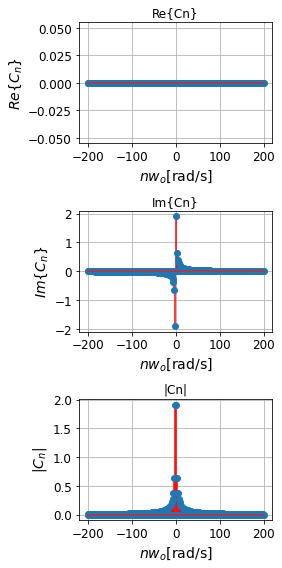

In [8]:
#graficar espectro
fig = plt.figure(figsize=(4,8))
plt.subplot(3,1,1)
plt.stem(nv, np.real(Cn), 'r')
plt.title(r'Re{Cn}')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(3,1,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.title(r'Im{Cn}')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(3,1,3)
plt.stem(nv, abs(Cn), 'r')
plt.title(r'|Cn|')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

# Error relativo

El error cuadrático medio de la representación generalizada de Fourier se define como:
\begin{equation}
E^2(c_n) = \frac{1}{T}\int\limits_{-T/2}^{T/2}{\left|x(t)-\sum\limits_{n=-N}^{N}{c_n \varphi_n(t)}\right|^2dt},
\end{equation}

El error relativo se puede definir entonces como:

\begin{equation}
E_r[\%] = \frac{E^2(c_n)}{P_x} = 1 - \sum\limits_{n=-N}^N{|c_n|^2 P_n/P_x},
\end{equation}

\begin{equation}
P_x = \int\limits_{-T/2}^{T/2}{|x(t)^2|dt}, \quad P_n = \int\limits_{-T/2}^{T/2}{|\varphi_n(t)^2|dt}.
\end{equation}
para el caso de Fourier $\varphi_n(t)=e^{jn\omega_ot}$ y $P_n=1$, por consiguiente:

\begin{equation}
E_r[\%] = 1 - \left(\frac{1}{P_x}\sum\limits_{n=-N}^N{|c_n|^2}\right).
\end{equation}

Para el ejemplo estudiado $P_x = A^2$ y $c_0=0$, es decir:

\begin{equation}
E_r[\%] = 1 - \left(\frac{2}{A^2}\sum\limits_{n=1}^N{\left|\frac{jA(1-(-1)^n)}{n \pi}\right|^2}\right).
\end{equation}



In [9]:
Px = A**2 # estimar según señal estudiada
def pltest(Na=1):
    ind = range(N-Na,N+Na+1)
    er = 1- (abs(Cn[N])**2 + 2*np.sum(abs(Cn[N:N+Na+1])**2))/Px
    xe = phin[:,ind]@ Cn[ind] 
    plt.plot(tv,xe,color='b',label='xe')
    plt.plot(tv,xo,color='r',label='x')
    plt.title('Er=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=200, min=1), Output()), _dom_classes=('widget-i…

<function __main__.pltest>

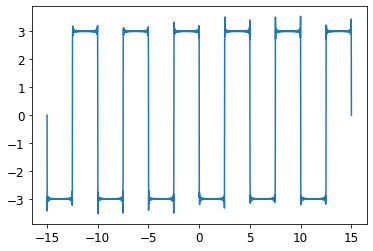

In [ ]:
N2 = 2000
t2 = np.linspace(-3*T,3*T,2000)
N = 200 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# %% definir bases
phin = np.zeros((N2,2*N+1),dtype=np.complex_)
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*t2)


xe2 = phin@ Cn

plt.plot(t2,xe2)

$\lim_{\Delta t \to 0} \frac{x(t)-x(t-\Delta t)}{\Delta t}$

## Ejercicio: Ajustar los códigos para el caso de la serie trigonométrica y compacta